# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data

In [2]:
customers = pd.read_csv(r"C:\Users\SATHWIK\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\SATHWIK\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\SATHWIK\Downloads\Transactions.csv")

# Inspect the first few rows of each dataset

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Data Preprocessing

In [4]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Handling missing values 

In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Basic summary statistics for numerical columns

In [6]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

# Exploratory Data Analysis

# 1. Customer Distribution by Region

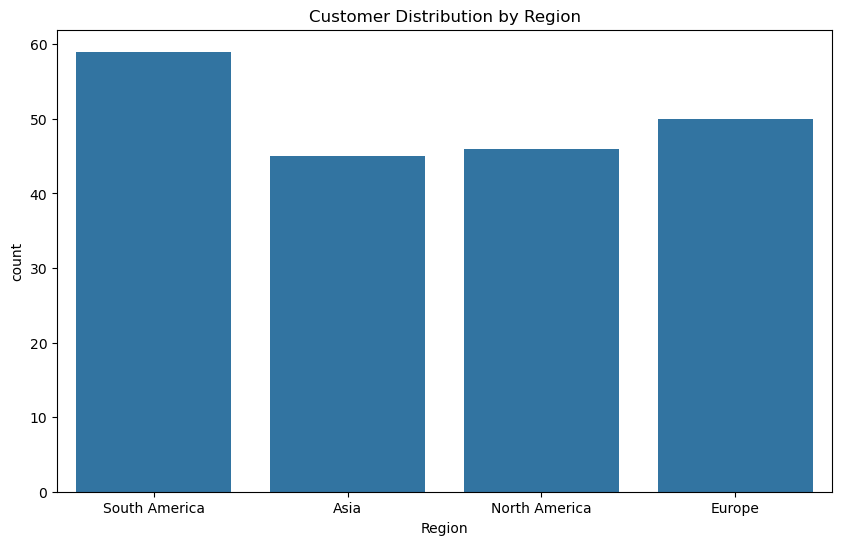

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

# 2. Distribution of Transaction Values

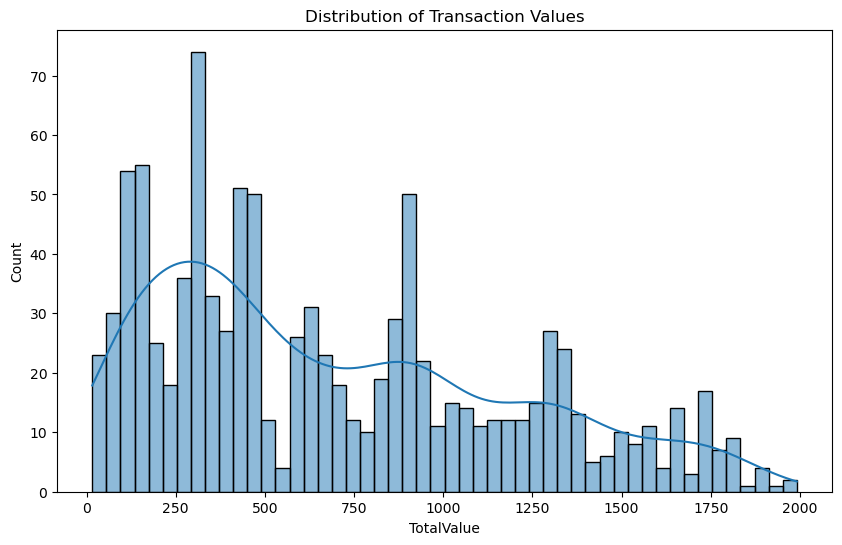

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.show()

# 3. Price vs Total Value of Transactions

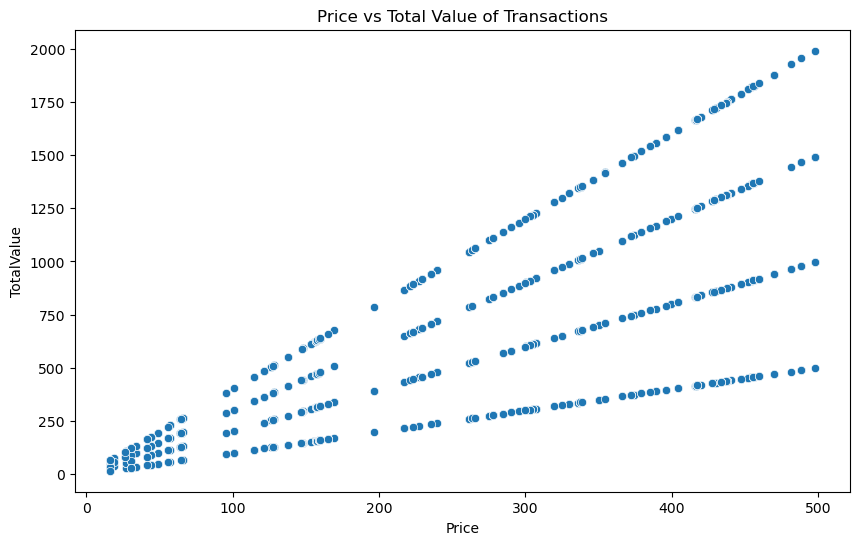

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Price', y='TotalValue')
plt.title('Price vs Total Value of Transactions')
plt.show()

# 4. Total Sales by Product Category

In [10]:
category_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
merged_products = pd.merge(category_sales, products, on='ProductID')
category_sales_by_product = merged_products.groupby('Category')['TotalValue'].sum().reset_index()

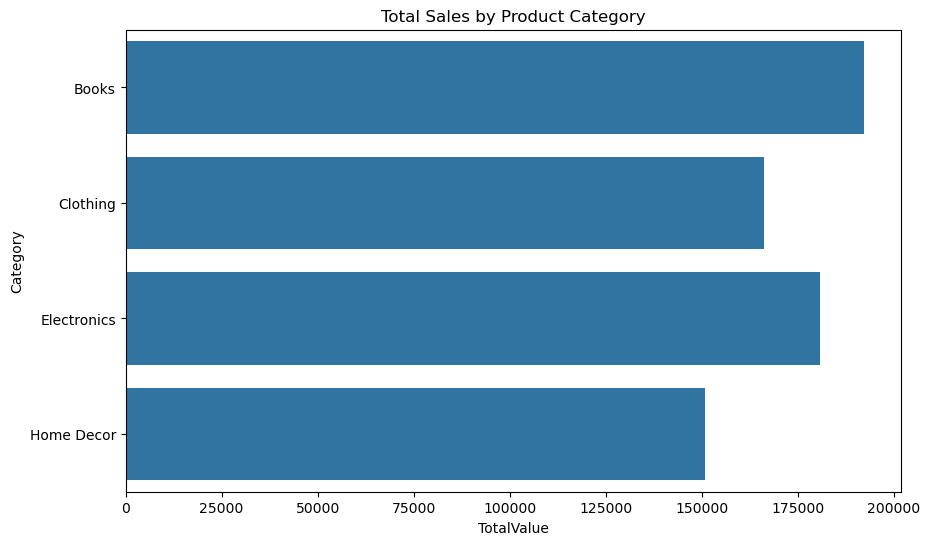

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Category', data=category_sales_by_product)
plt.title('Total Sales by Product Category')
plt.show()

# 5. Customer Signup Trend Over Time

In [12]:
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size().reset_index(name='CustomerCount')
signup_trend['SignupDate'] = signup_trend['SignupDate'].dt.to_timestamp()

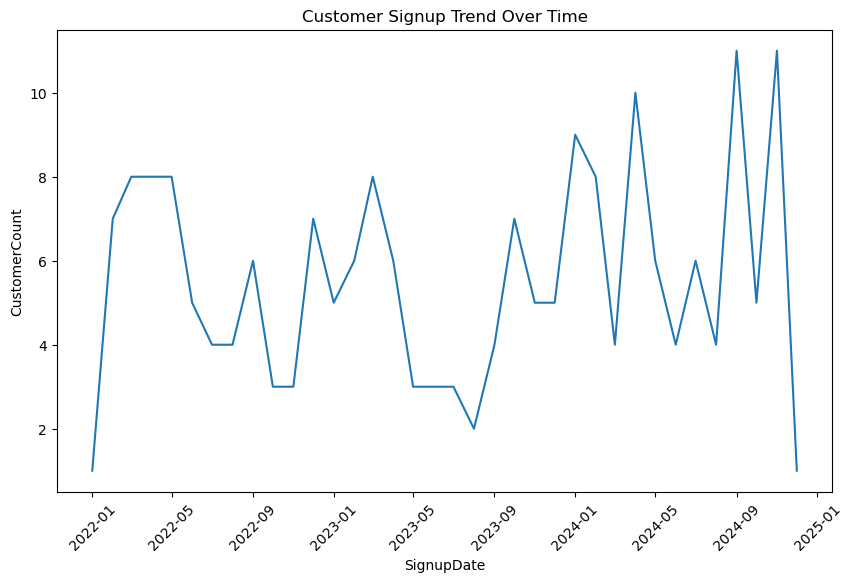

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=signup_trend, x='SignupDate', y='CustomerCount')
plt.title('Customer Signup Trend Over Time')
plt.xticks(rotation=45)
plt.show()